# **Capstone project: Providing data-driven suggestions for HR**

# **PACE stages**


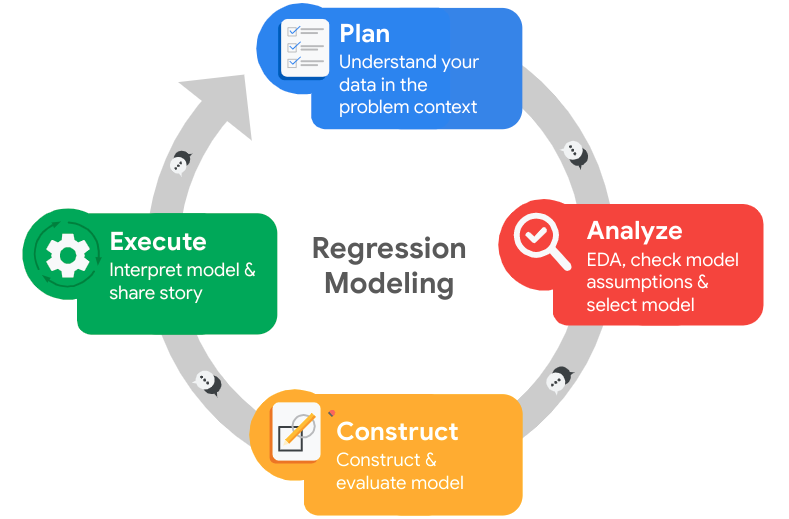

## **Pace: Plan**

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Step 1. Imports



### Import packages

In [1]:
# Import packages
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import randint
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, f1_score,\
recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay,\
roc_auc_score
from sklearn.inspection import permutation_importance

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [ ]:
#%pip install kagglehub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [kagglehub]

[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mfaisalqureshi/hr-analytics-and-job-prediction")

print("Path to dataset files:", path)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 110k/110k [00:00<00:00, 2.01MB/s]

Extracting files...
Path to dataset files: /Users/simonemezzabotta/.cache/kagglehub/datasets/mfaisalqureshi/hr-analytics-and-job-prediction/versions/1


In [7]:
# Load dataset into a dataframe
df0 = pd.read_csv(path + "/HR_comma_sep.csv")


# Display first few rows of the dataframe
df0.head(10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)



### Gather basic information about the data

In [8]:
# Gather basic information about the data
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [9]:
# Gather descriptive statistics about the data
df0.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [10]:
# Display all column names
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [11]:
# Rename columns as needed
df1 = df0.rename(columns={'Department': 'department', 
                          'Work_accident': 'work_accident', 
                          'time_spend_company': 'tenure',
                         'average_montly_hours': 'average_monthly_hours'})


# Display all column names after the update
df1.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [12]:
# Check for missing values
df1.isna().any(axis=1).sum()


np.int64(0)

### Check duplicates

Check for any duplicate entries in the data.

In [13]:
# Check for duplicates
df1.duplicated().sum()


np.int64(3008)

In [14]:
# Inspect some rows containing duplicates as needed
df1[df1.duplicated(keep=False)]


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [15]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df_subset = df1.drop_duplicates().reset_index(drop=True)


# Display first few rows of new dataframe as needed
df_subset.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [16]:
df_subset.shape

(11991, 10)

### Check outliers

Check for outliers in the data.

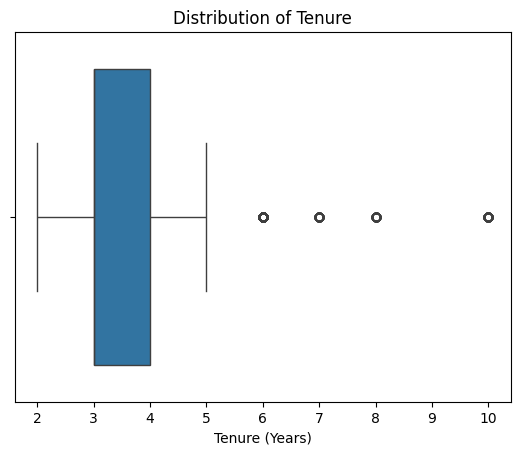

In [17]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
sns.boxplot(data=df_subset, x='tenure')
plt.title('Distribution of Tenure')
plt.xlabel("Tenure (Years)")
plt.show()



In [18]:
# Determine the number of rows containing outliers
# Calculate Q1, Q3, and IQR
q1 = df_subset.tenure.quantile(0.25)
q3 = df_subset.tenure.quantile(0.75)
iqr = q3 - q1

# Determine bounds
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

tenure_outliers_mask = (df_subset.tenure < lower_bound) | (df_subset.tenure > upper_bound)
df_subset[tenure_outliers_mask].shape[0]
#df_subset[tenure_outliers_mask].head()

824

# pAce: Analyze Stage


## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [19]:
# Get numbers and percentages of people who left vs. stayed 
print(df_subset.left.value_counts(), 
      df_subset.left.value_counts(normalize=1),
      sep='\n')


left
0    10000
1     1991
Name: count, dtype: int64
left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

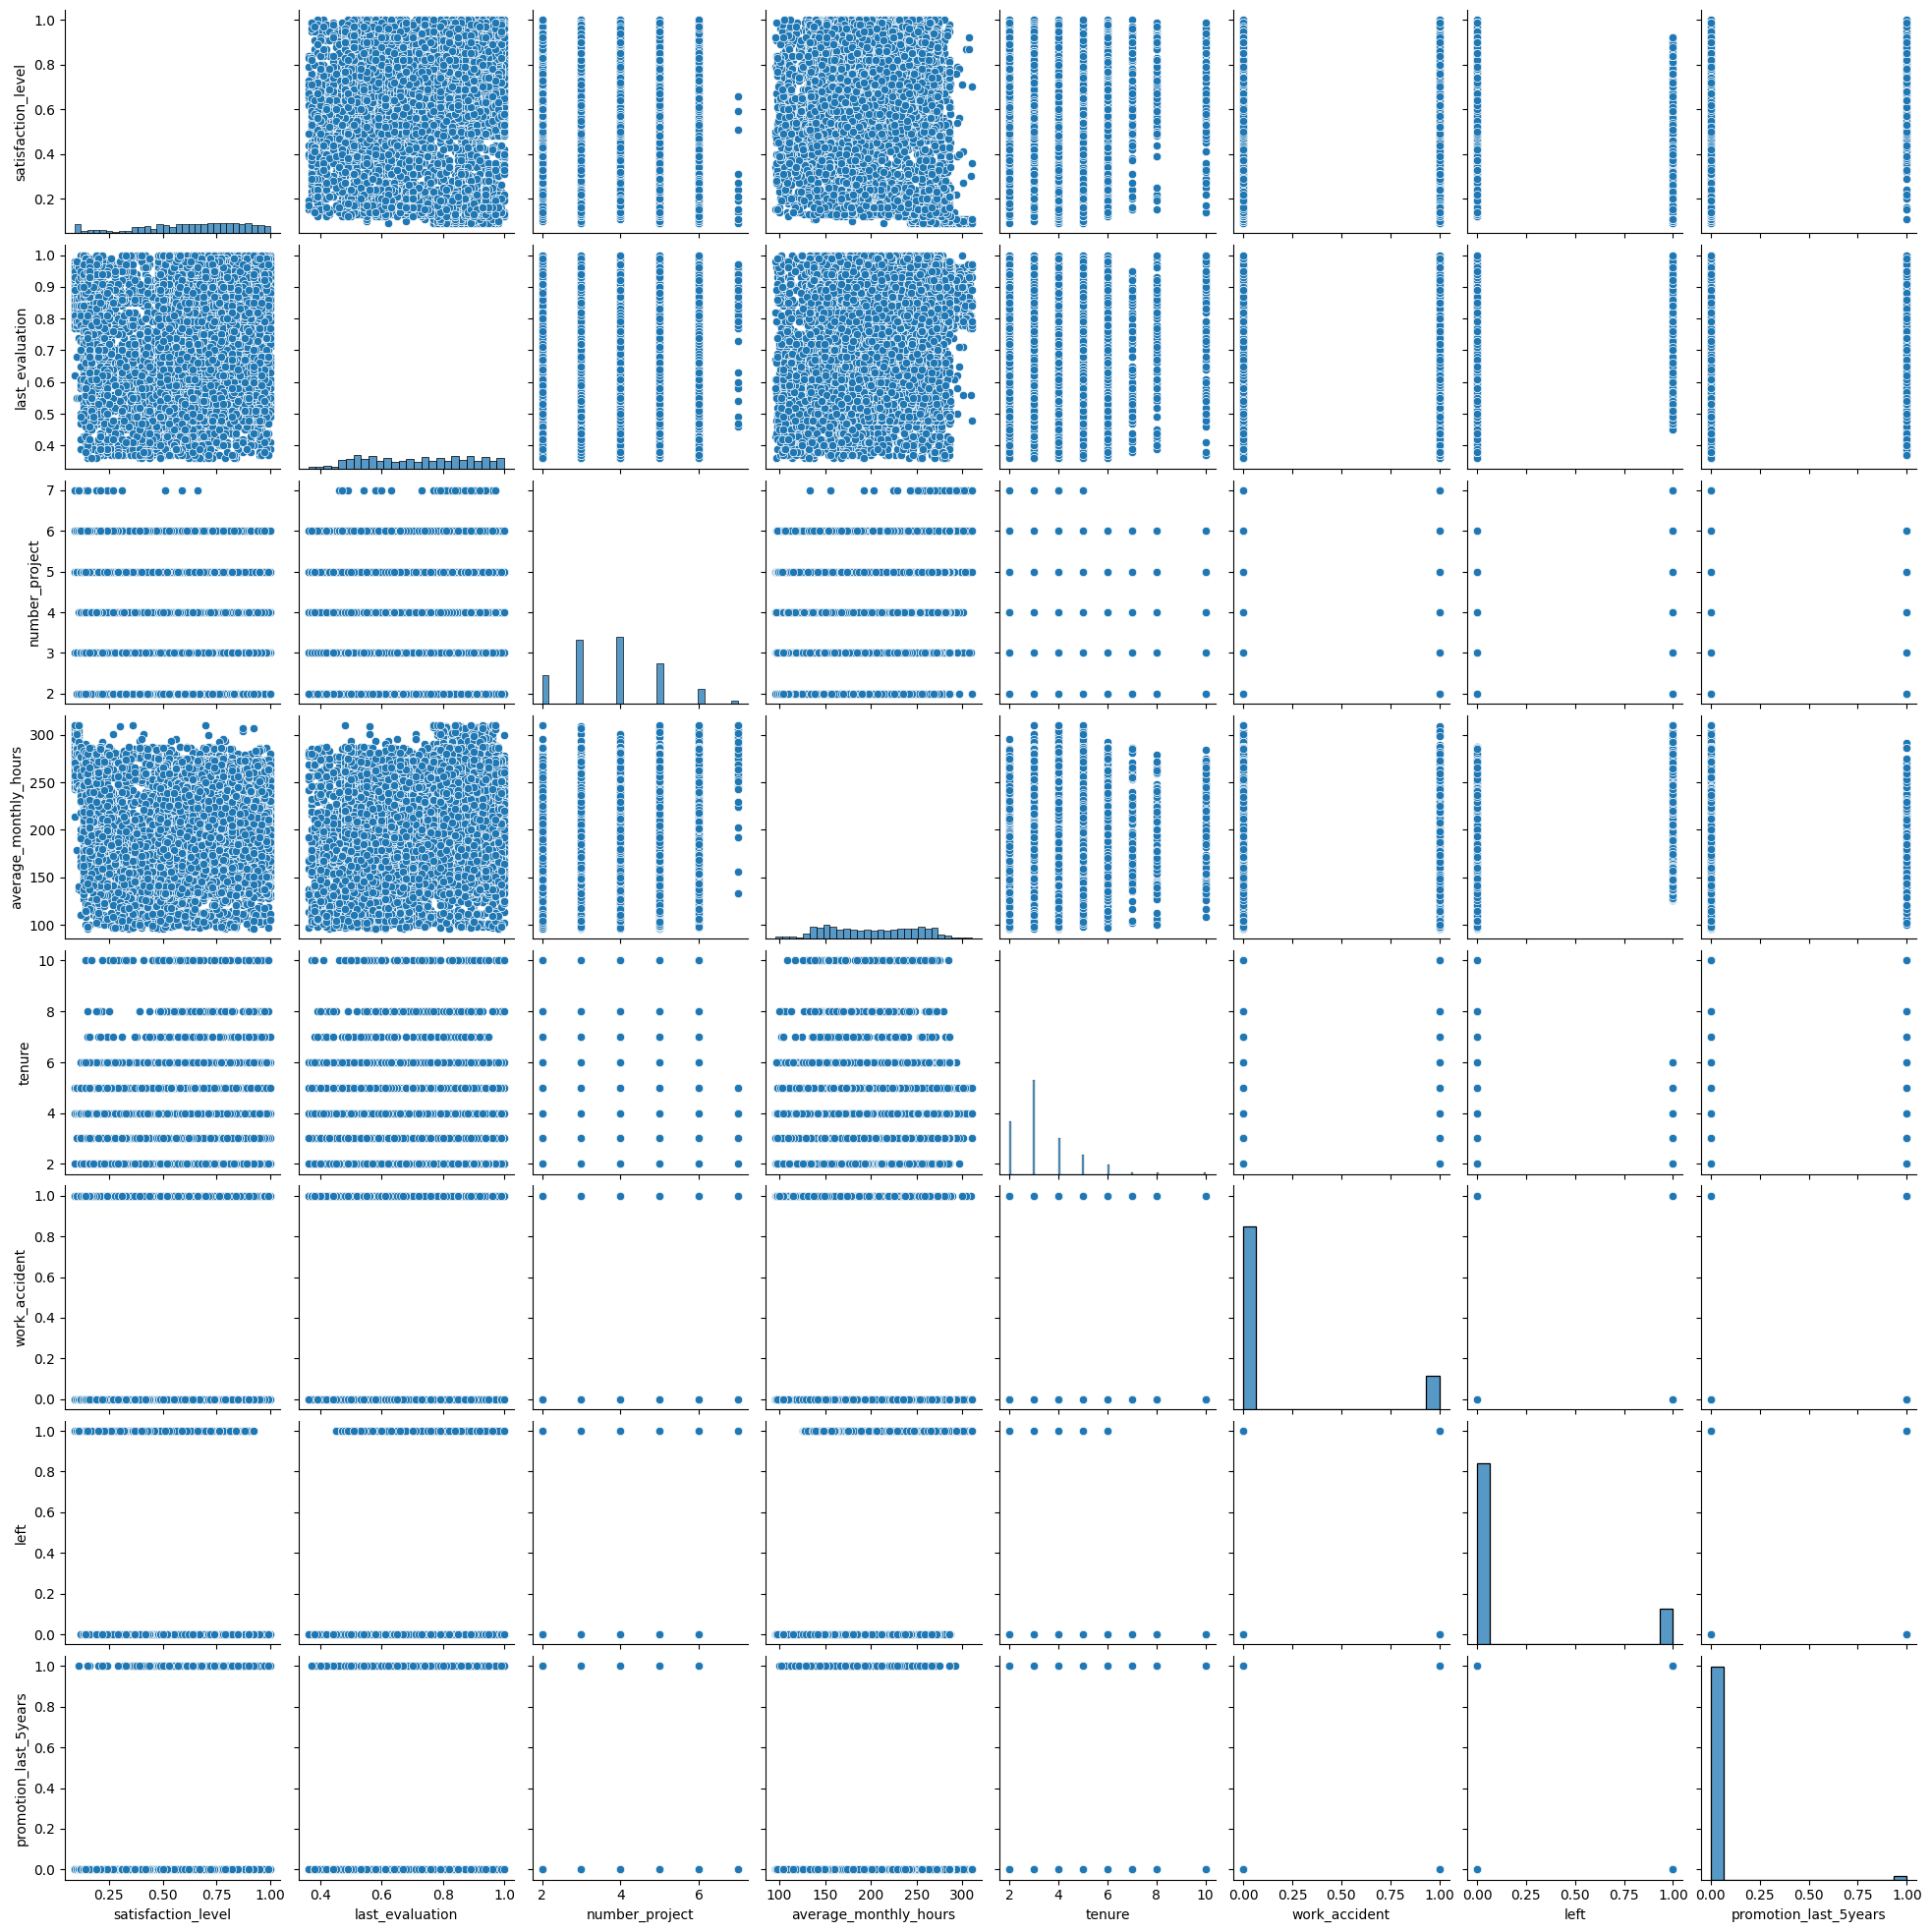

In [20]:
# Create a plot as needed
sns.pairplot(df_subset)


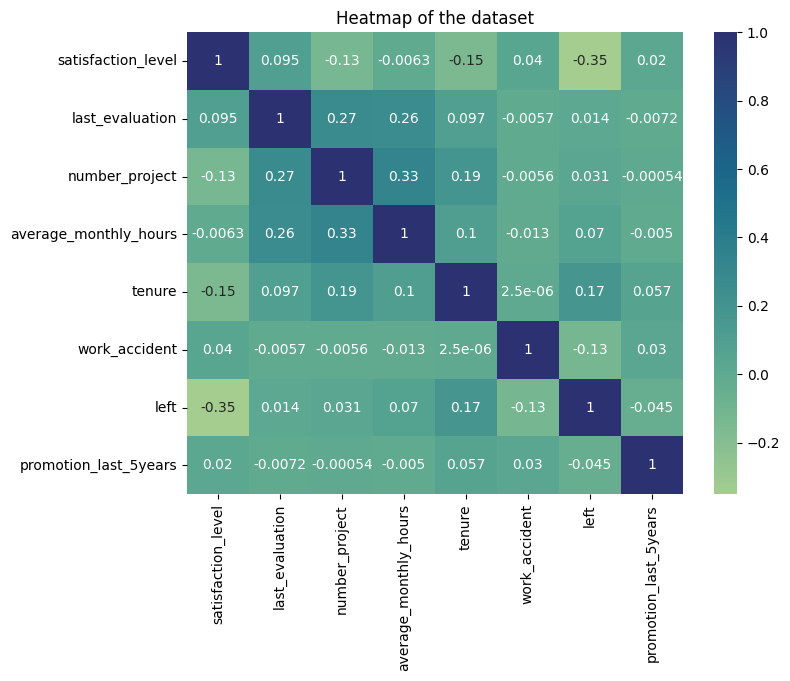

In [22]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(
    df_subset.corr(numeric_only=True), 
    annot=True, 
    cmap="crest")
plt.title("Heatmap of the dataset")
plt.show()

<Figure size 1500x1500 with 0 Axes>

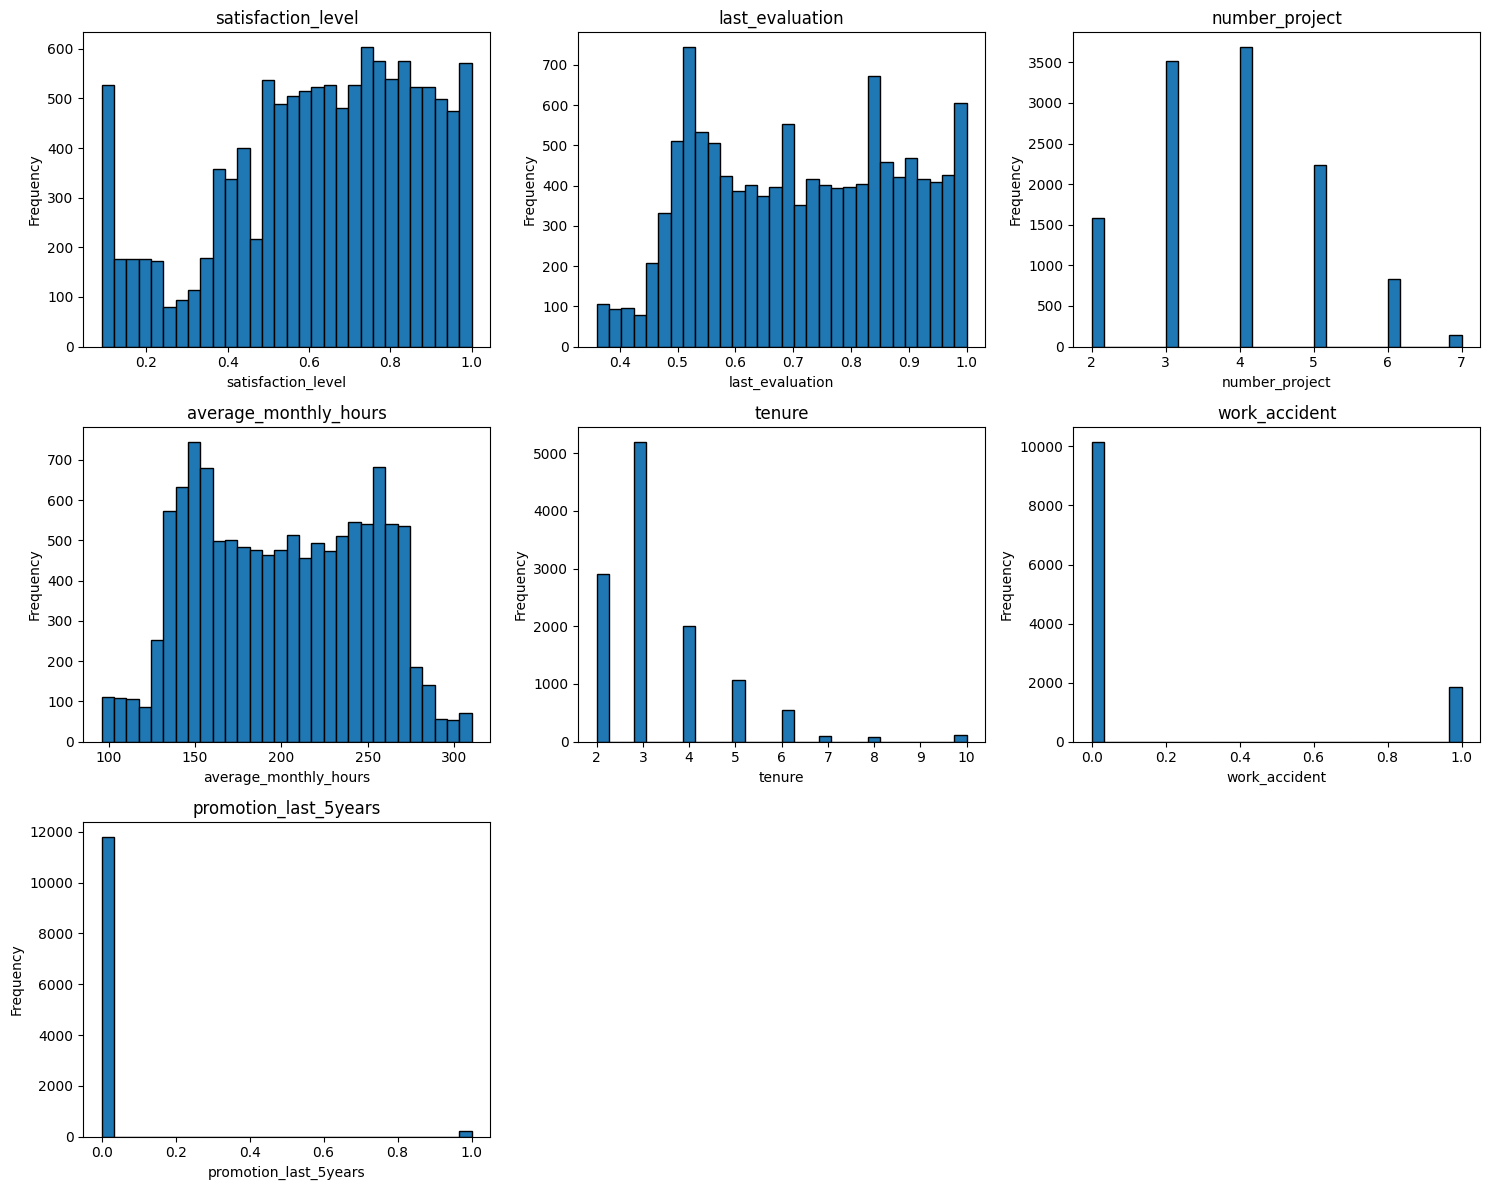

In [23]:
# Create a plot as needed
cols_to_plot = df_subset.drop(columns=['left']).select_dtypes(include='number')

n_cols = 3
n_rows = (len(cols_to_plot.columns) + n_cols - 1) // n_cols

plt.figure(figsize=(15, 5 * n_rows))

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

# Plot each histogram
for i, col in enumerate(cols_to_plot.columns):
    cols_to_plot[col].plot.hist(ax=axes[i], bins=30, edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)
    
plt.tight_layout()
plt.show()

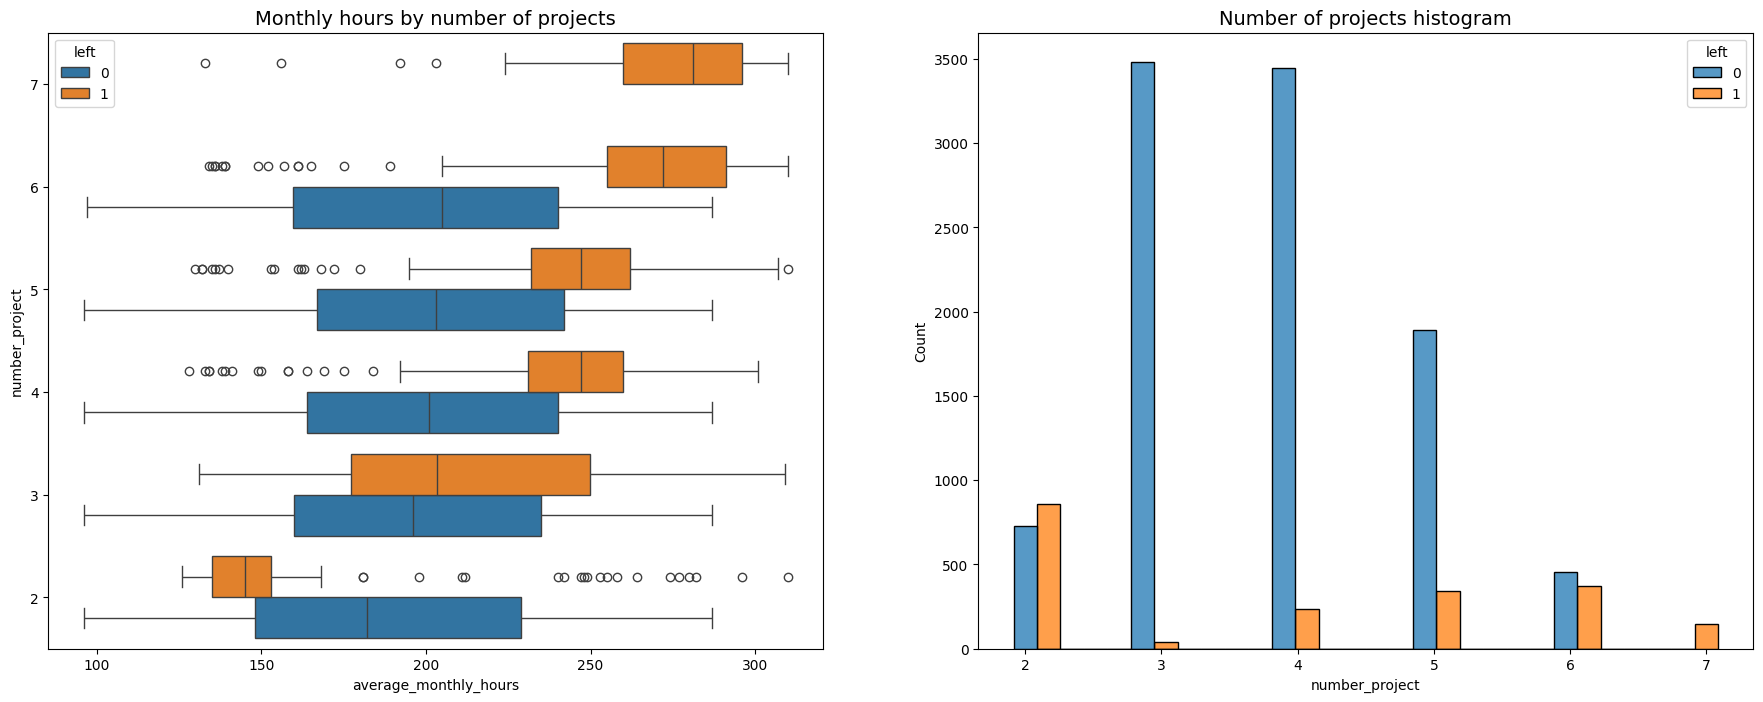

In [24]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df_subset, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = df_subset[df_subset['left']==0]['number_project']
tenure_left = df_subset[df_subset['left']==1]['number_project']
sns.histplot(data=df_subset, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

# Display the plots
plt.show()

It might be natural that people who work on more projects would also work longer hours. This appears to be the case here, with the mean hours of each group (stayed and left) increasing with number of projects worked. However, a few things stand out from this plot.

1. There are two groups of employees who left the company: (A) those who worked considerably less than their peers with the same number of projects, and (B) those who worked much more. Of those in group A, it's possible that they were fired. It's also possible that this group includes employees who had already given their notice and were assigned fewer hours because they were already on their way out the door. For those in group B, it's reasonable to infer that they probably quit. The folks in group B likely contributed a lot to the projects they worked in; they might have been the largest contributors to their projects. 

2. Everyone with seven projects left the company, and the interquartile ranges of this group and those who left with six projects was ~255&ndash;295 hours/month&mdash;much more than any other group. 

3. The optimal number of projects for employees to work on seems to be 3&ndash;4. The ratio of left/stayed is very small for these cohorts.

4. If you assume a work week of 40 hours and two weeks of vacation per year, then the average number of working hours per month of employees working Monday&ndash;Friday `= 50 weeks * 40 hours per week / 12 months = 166.67 hours per month`. This means that, aside from the employees who worked on two projects, every group&mdash;even those who didn't leave the company&mdash;worked considerably more hours than this. It seems that employees here are overworked.


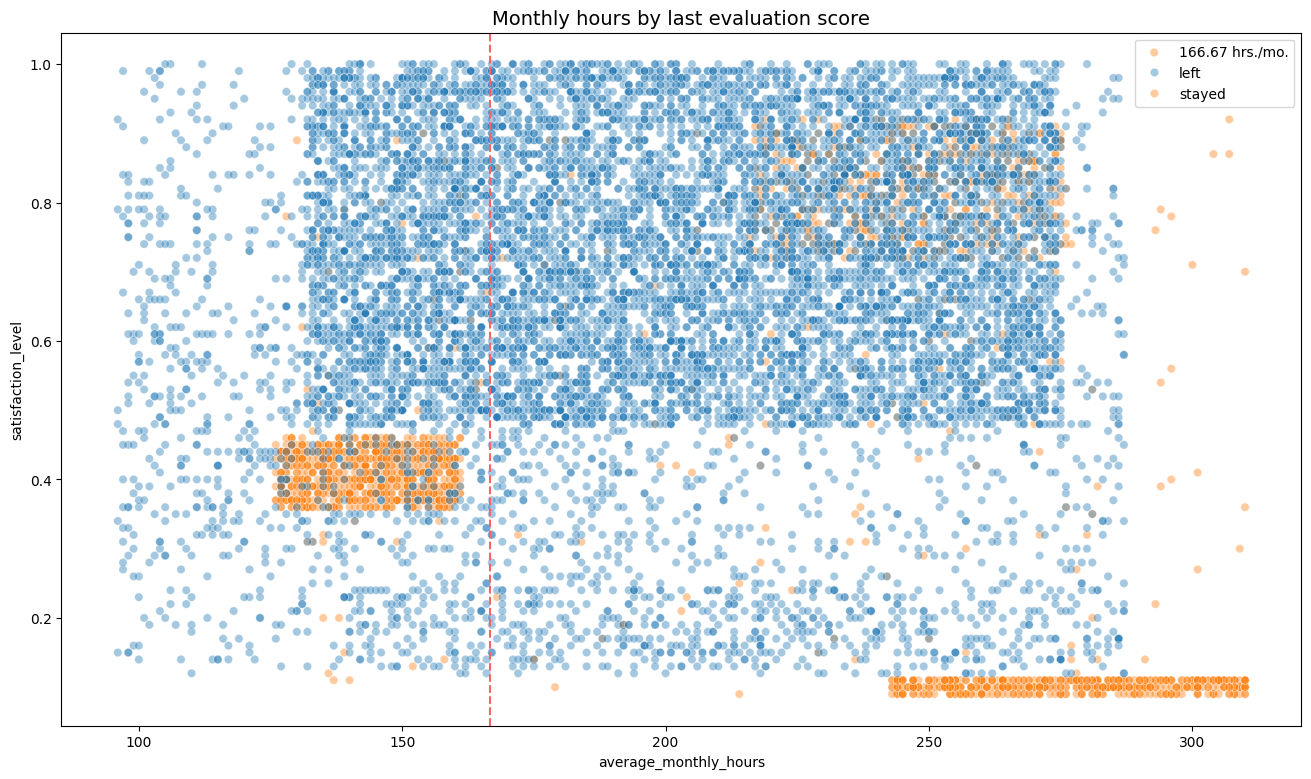

In [ ]:
# Create scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df_subset, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14')

The scatterplot above shows that there was a sizeable group of employees who worked ~240&ndash;315 hours per month. 315 hours per month is over 75 hours per week for a whole year. It's likely this is related to their satisfaction levels being close to zero. 

The plot also shows another group of people who left, those who had more normal working hours. Even so, their satisfaction was only around 0.4. It's difficult to speculate about why they might have left. It's possible they felt pressured to work more, considering so many of their peers worked more. And that pressure could have lowered their satisfaction levels. 

Finally, there is a group who worked ~210&ndash;280 hours per month, and they had satisfaction levels ranging ~0.7&ndash;0.9. 

Note the strange shape of the distributions here. This is indicative of data manipulation or synthetic data. 

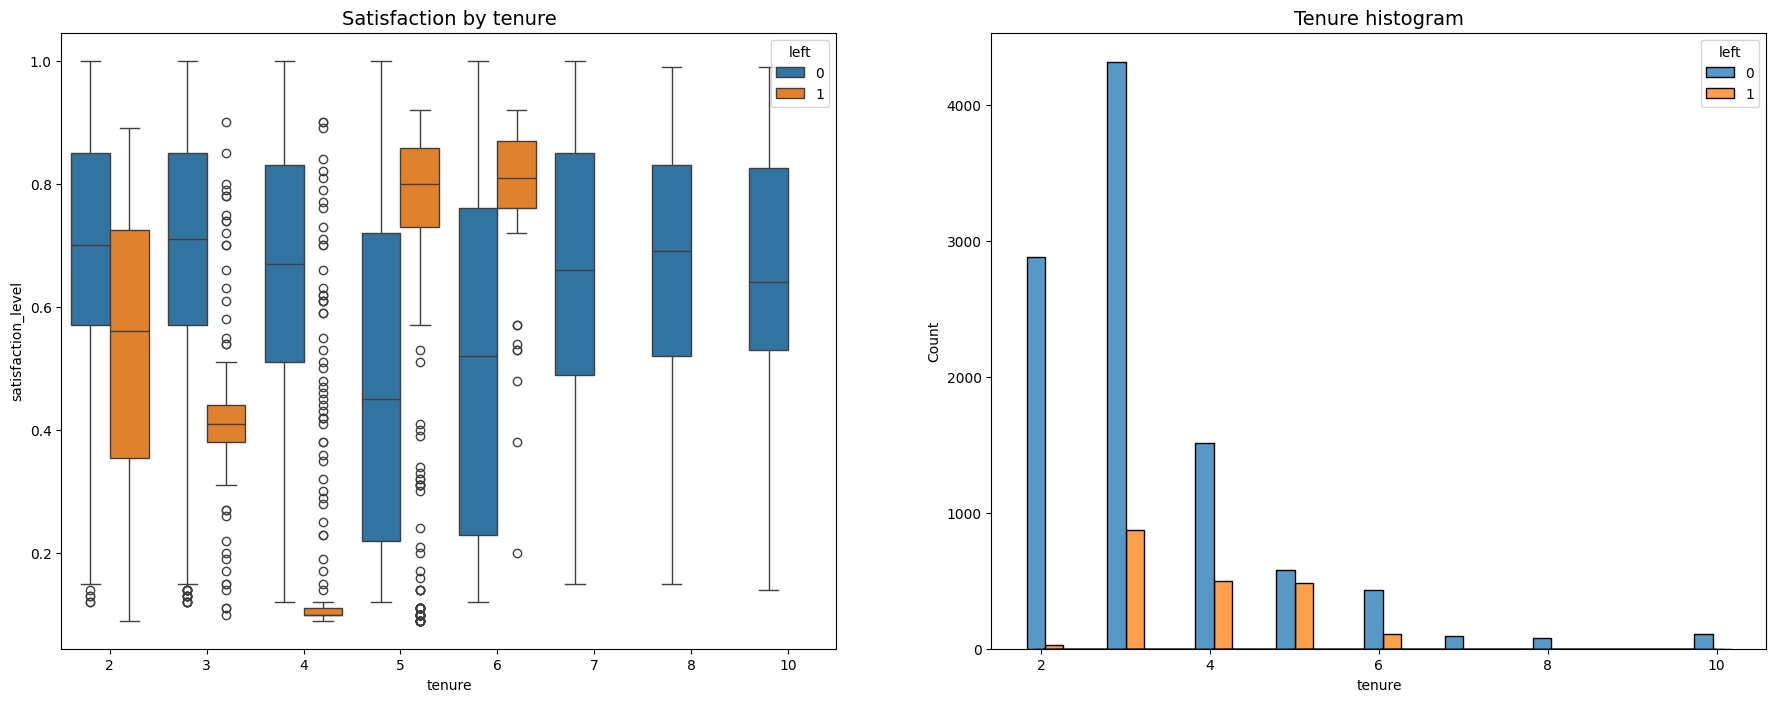

In [ ]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=df_subset, x='tenure', y='satisfaction_level', hue='left', orient="v", ax=ax[0])
ax[0].set_title('Satisfaction by tenure', fontsize='14')

# Create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
tenure_stay = df_subset[df_subset['left']==0]['tenure']
tenure_left = df_subset[df_subset['left']==1]['tenure']
sns.histplot(data=df_subset, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show()

There are many observations you could make from this plot.
- Employees who left fall into two general categories: dissatisfied employees with shorter tenures and very satisfied employees with medium-length tenures.
- Four-year employees who left seem to have an unusually low satisfaction level. It's worth investigating changes to company policy that might have affected people specifically at the four-year mark, if possible. 
- The longest-tenured employees didn't leave. Their satisfaction levels aligned with those of newer employees who stayed. 
- The histogram shows that there are relatively few longer-tenured employees. It's possible that they're the higher-ranking, higher-paid employees.


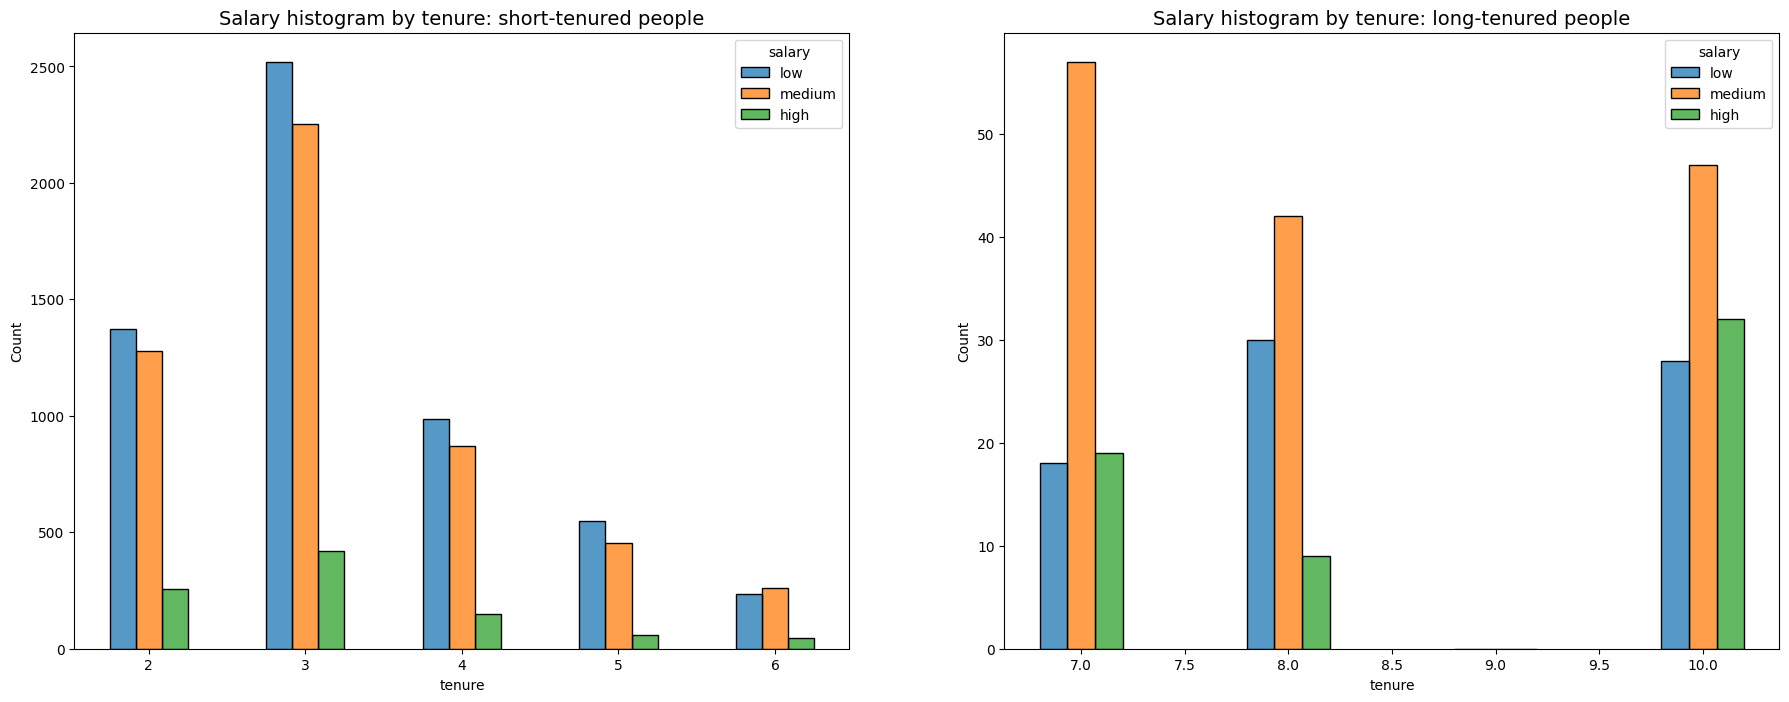

In [ ]:
# Create a plot as needed 

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = df_subset[df_subset['tenure'] < 7]

# Define long-tenured employees
tenure_long = df_subset[df_subset['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14')


The plots above show that long-tenured employees were not disproportionately comprised of higher-paid employees. 

Next, you could explore whether there's a correlation between working long hours and receiving high evaluation scores. You could create a scatterplot of `average_monthly_hours` versus `last_evaluation`.

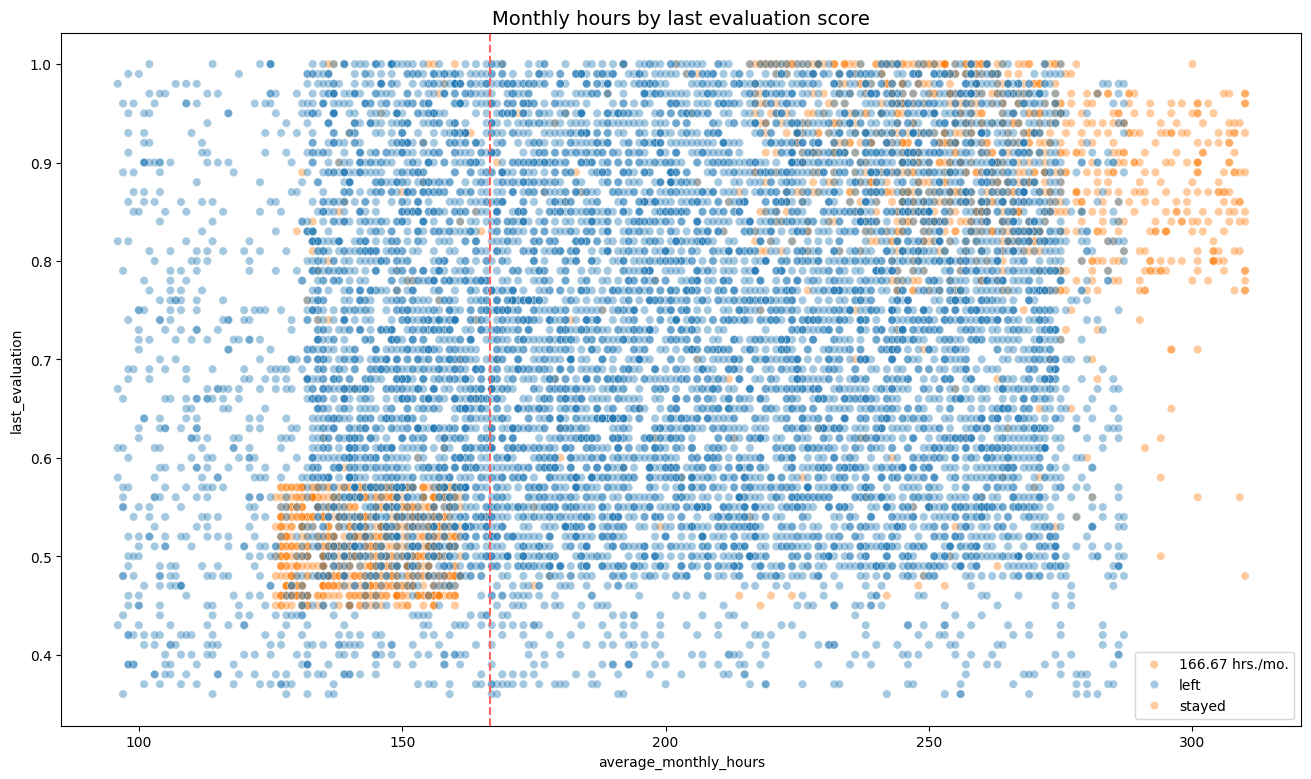

In [ ]:
# Create a plot as needed 

# Create scatterplot of `average_monthly_hours` versus `last_evaluation`
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df_subset, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14')

The following observations can be made from the scatterplot above:
- The scatterplot indicates two groups of employees who left: overworked employees who performed very well and employees who worked slightly under the nominal monthly average of 166.67 hours with lower evaluation scores. 
- There seems to be a correlation between hours worked and evaluation score. 
- There isn't a high percentage of employees in the upper left quadrant of this plot; but working long hours doesn't guarantee a good evaluation score.
- Most of the employees in this company work well over 167 hours per month.

Next, you could examine whether employees who worked very long hours were promoted in the last five years.

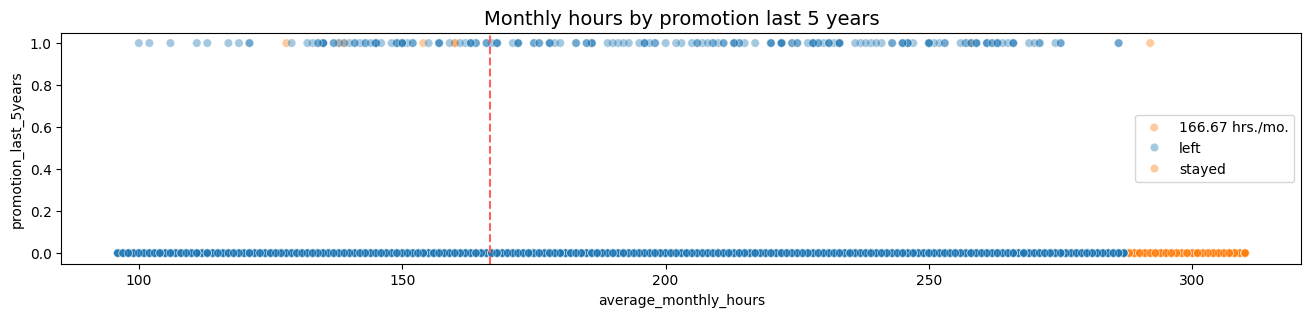

In [ ]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df_subset, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14')

The plot above shows the following:
- very few employees who were promoted in the last five years left
- very few employees who worked the most hours were promoted
- all of the employees who left were working the longest hours  

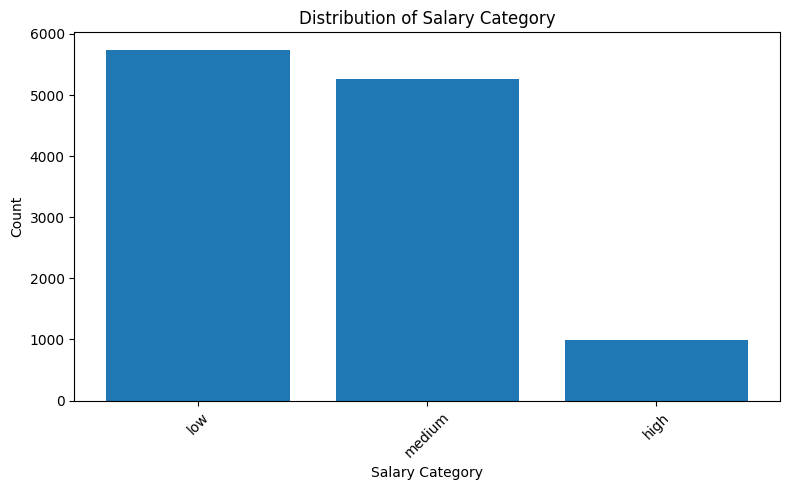

In [30]:
# Visualise distribution of salary
salary_counts = df_subset.salary.value_counts()
plt.figure(figsize=(8,5))
plt.bar(salary_counts.index, salary_counts.values)
plt.title('Distribution of Salary Category')
plt.xlabel('Salary Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

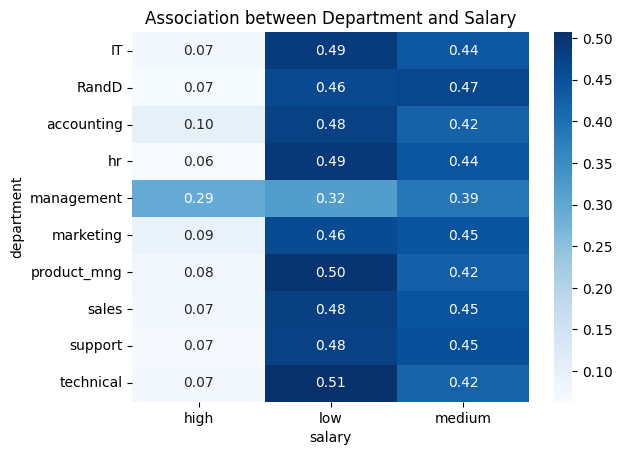

In [31]:
# Visualise relationship between salary and department
ct_salary_department = pd.crosstab(df_subset['department'], df_subset['salary'], normalize='index')  
sns.heatmap(ct_salary_department, annot=True, cmap='Blues',fmt='.2f')
plt.title('Association between Department and Salary')
plt.show()



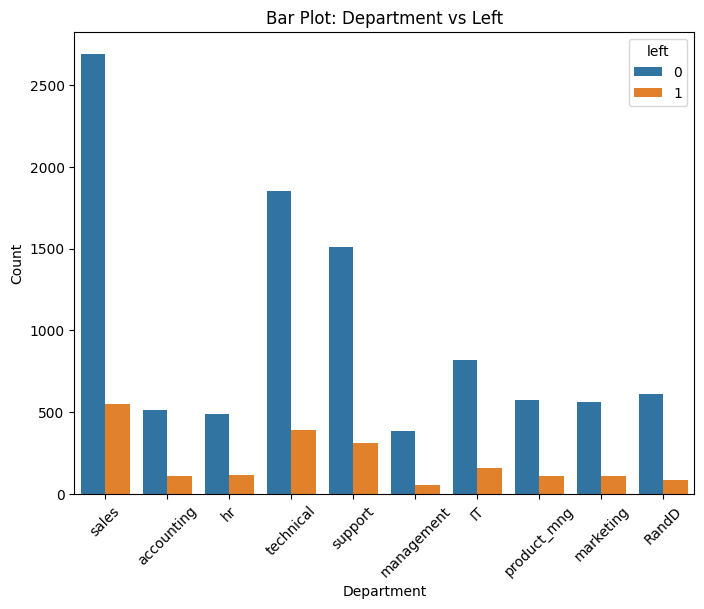

In [32]:
# Bar plot of 'department' vs 'left'
plt.figure(figsize=(8, 6))
sns.countplot(data=df_subset, x='department', hue='left')
plt.title('Bar Plot: Department vs Left')
plt.xlabel('Department')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()


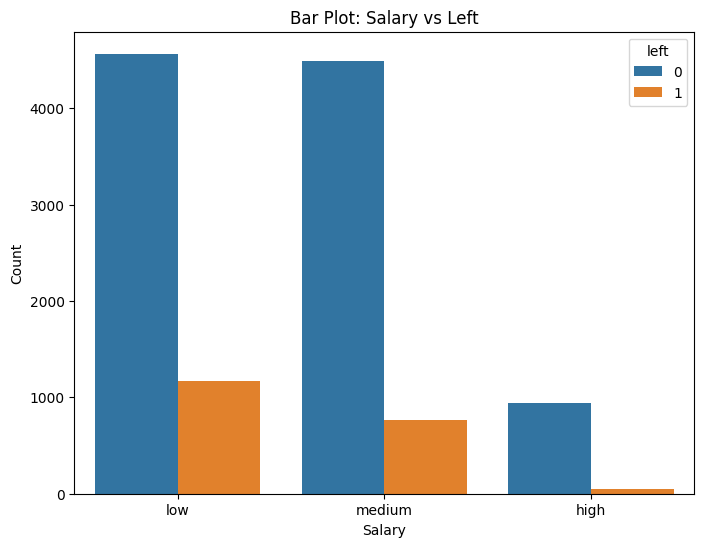

In [33]:
# Bar plot of 'salary' vs 'left'
plt.figure(figsize=(8, 6))
sns.countplot(data=df_subset, x='salary', hue='left')
plt.title('Bar Plot: Salary vs Left')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show()

In [23]:
pd.crosstab(df_subset['promotion_last_5years'], df_subset['left'], normalize='columns')

left,0,1
promotion_last_5years,,
0,0.9805,0.995982
1,0.0195,0.004018


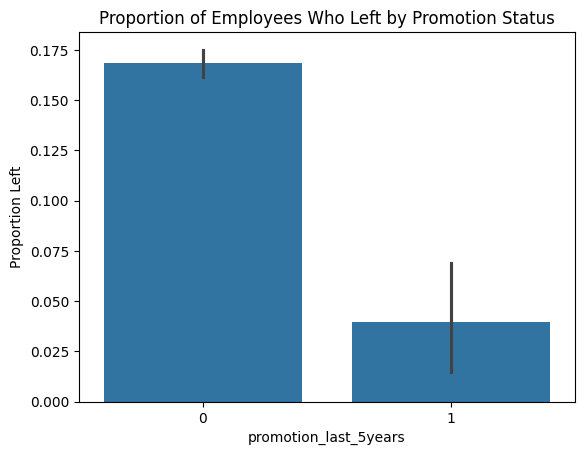

In [34]:
# Visualise relationship between promotion and left
sns.barplot(x='promotion_last_5years', y='left', data=df_subset)
plt.title('Proportion of Employees Who Left by Promotion Status')
plt.ylabel('Proportion Left')
plt.show()

In [35]:
pd.crosstab(df_subset['work_accident'], df_subset['left'], normalize='columns')

left,0,1
work_accident,,
0,0.8255,0.947263
1,0.1745,0.052737


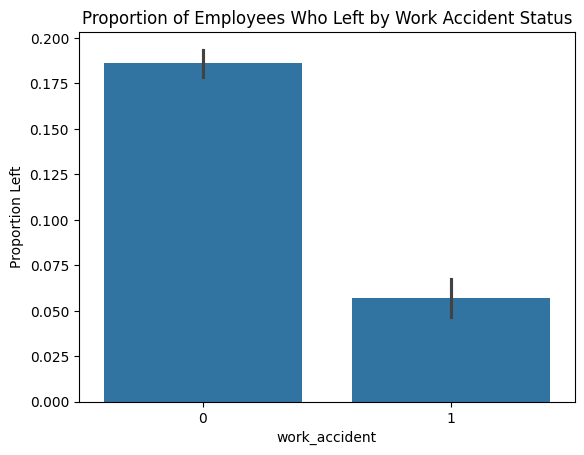

In [38]:
# Visualise relationship between work accidents and left
sns.barplot(x='work_accident', y='left', data=df_subset)
plt.title('Proportion of Employees Who Left by Work Accident Status')
plt.ylabel('Proportion Left')
plt.show()

### Insights

It appears that employees are leaving the company as a result of poor management. Leaving is tied to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave. 

###  Step 3:
- Encode categorical variables
- Drop useless columns (if any)
- Isolate target variable
- Isolate features

In [47]:
# Encode categorical variables
df_dummies = pd.get_dummies(data=df_subset, columns=['department', 'salary'], drop_first=1, dtype='int')
df_dummies.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [48]:
# Isolate target variable
y = df_dummies["left"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [49]:
# Isolate features
X = df_dummies.copy()
X = X.drop(columns=['left'])
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,1,0,0,1,0


# paCe: Construct Stage


## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size


**Random Forest model assumptions**
- Feature independence: Not required, but uncorrelated features improve performance and feature importance clarity
- Outliers: Robust to outliers in general
- Missing values: Cannot handle missing data directly — you must impute
- Collinearity: Can handle, but degrades interpretability°

## Step 3. Model Building, Step 4. Results and Evaluation

### Identify the type of prediction task.

Classification

### Identify the types of models most appropriate for this task.

Logistic Regression and Random Forest Model

### Modeling

Add as many cells as you need to conduct the modeling process.

Split dataset into three sets:

	•	Train: 60% → model training
	•	Validation (Eval): 20% → model selection / hyperparameter tuning
	•	Test: 20% → final unbiased evaluation

In [50]:
# First split: Train vs Temp (Eval+Test)
X_temp, X_test, y_temp, y_test = train_test_split(X, 
                                                  y, 
                                                  test_size=0.2, 
                                                  stratify=y,
                                                  random_state=42
                                                 )
# Second split: Train vs Eval
X_train, X_eval, y_train, y_eval = train_test_split(X_temp, 
                                                  y_temp, 
                                                  test_size=0.25, 
                                                  stratify=y_temp,
                                                  random_state=42
                                                 )


In [51]:
# Check shapes
print(X_train.shape,
      y_train.shape,
      X_eval.shape,
      y_eval.shape,
      X_test.shape,
      y_test.shape,
      sep='\n'
     )

(7194, 18)
(7194,)
(2398, 18)
(2398,)
(2399, 18)
(2399,)


### Model 1: Logistic Regression

Before fitting the model, need to make sure that the following assumptions are met:

1) Binary Target: The dependent variable ('left') is binary.

2) No perfect multicollinearity: let's use VIF (variance inflation factor) to check

In [52]:
# Add constant (intercept) to the model
X_with_const = add_constant(X_train)

# Calculate VIF for each feature
vif = pd.DataFrame()
vif['Variable'] = X_with_const.columns
vif['VIF'] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]
print(vif)

                  Variable        VIF
0                    const  64.748474
1       satisfaction_level   1.068678
2          last_evaluation   1.149259
3           number_project   1.218762
4    average_monthly_hours   1.165629
5                   tenure   1.077977
6            work_accident   1.005754
7    promotion_last_5years   1.026624
8         department_RandD   1.600961
9    department_accounting   1.557282
10           department_hr   1.531637
11   department_management   1.419885
12    department_marketing   1.595510
13  department_product_mng   1.590634
14        department_sales   3.093195
15      department_support   2.395702
16    department_technical   2.618515
17              salary_low   3.610761
18           salary_medium   3.575666


Overall, none of the variables have a VIF above 10, so there doesn’t seem to be a severe multicollinearity issue in the model. Most of the predictors, including department and salary variables, are within the acceptable range (VIF < 5), so multicollinearity should not significantly impact the model’s performance or interpretation.

3) Independence: this condition is met

4) Linearity: This condition is met for all variables

Let's now initialise and fit the model

In [53]:
# Initialise logistic regression model (use class_weight since data is imbalanced)
log_model = LogisticRegression(class_weight='balanced', 
                               max_iter=800,
                               random_state=42
                              ) 

In [54]:
%%time
# Fit the model
log_model.fit(X_train, y_train)

CPU times: user 84.4 ms, sys: 5.8 ms, total: 90.2 ms
Wall time: 91.1 ms


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_linea

LogisticRegression(class_weight='balanced', max_iter=800, random_state=42)

### Model 2: Random Forest

In [55]:
# Initialise Random Forest model (use class_weight since data is imbalanced)
rf_model = RandomForestClassifier(class_weight='balanced',
                                  random_state=42
                              )

Perform a Randomized Search

In [56]:
# Define a param dictionary
params_dic = {
    'n_estimators': stats.randint(50, 300),            # number of trees
    'max_depth': stats.randint(5, 50),                 # depth of each tree
    'min_samples_split': stats.randint(2, 20),         # min samples to split an internal node
    'min_samples_leaf': stats.randint(1, 20),          # min samples at a leaf node
    'max_features': ['sqrt', 'log2', None],      # number of features to consider
    'bootstrap': [True, False],                  # bootstrap samples or not
    'criterion': ['gini', 'entropy', 'log_loss'] # splitting criterion
}

scoring = ['precision', 'recall', 'accuracy', 'f1', 'roc_auc']

# Instantiate random search
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=params_dic,
    n_iter=50,
    scoring=scoring,
    refit='roc_auc',  
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

In [57]:
%%time
# Fit the RandomizedSearch object
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
CPU times: user 772 ms, sys: 281 ms, total: 1.05 s
Wall time: 25.3 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x147ff0910>,
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': <sc...stats._distn_infrastructure.rv_discrete_frozen object at 0x133edfbb0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x147ff07d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x133617380>},
                   random_state=42, refit='roc_auc',
                   scoring=['precision', 'recall', 'accuracy', 'f1', 'roc_auc'],
                   verbose=1)

In [58]:
print("Best Parameters:", random_search.best_params_)
print("Best AUC Score:", random_search.best_score_)
best_rf_model = random_search.best_estimator_

Best Parameters: {'bootstrap': True, 'criterion': 'log_loss', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 196}
Best AUC Score: 0.9800839268660658


## Option 3: Feature Engineering

There is a chance that there is some data leakage occurring. Data leakage is when you use data to train your model that should not be used during training, either because it appears in the test data or because it's not data that you'd expect to have when the model is actually deployed. Training a model with leaked data can give an unrealistic score that is not replicated in production.

In this case, it's likely that the company won't have satisfaction levels reported for all of its employees. It's also possible that the `average_monthly_hours` column is a source of some data leakage. If employees have already decided upon quitting, or have already been identified by management as people to be fired, they may be working fewer hours. 

The first round of decision tree and random forest models included all variables as features. This next round will incorporate feature engineering to build improved models. 

We could proceed by dropping `satisfaction_level` and creating a new feature that roughly captures whether an employee is overworked. We could call this new feature `overworked`. It will be a binary variable.

In [60]:
# Drop `satisfaction_level` and save resulting dataframe in new variable
df2_dummies = df_dummies.drop('satisfaction_level', axis=1)

# Display first few rows of new dataframe
df2_dummies.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [61]:
# Create `overworked` column. For now, it's identical to average monthly hours.
df2_dummies['overworked'] = df2_dummies['average_monthly_hours']

# Inspect max and min average monthly hours values
print('Max hours:', df2_dummies['overworked'].max())
print('Min hours:', df2_dummies['overworked'].min())

Max hours: 310
Min hours: 96


166.67 is approximately the average number of monthly hours for someone who works 50 weeks per year, 5 days per week, 8 hours per day. 

You could define being overworked as working more than 175 hours per month on average.

To make the `overworked` column binary, you could reassign the column using a boolean mask.
- `df3['overworked'] > 175` creates a series of booleans, consisting of `True` for every value > 175 and `False` for every values ≤ 175
- `.astype(int)` converts all `True` to `1` and all `False` to `0` 

In [62]:
# Define `overworked` as working > 175 hrs/week
df2_dummies['overworked'] = (df2_dummies['overworked'] > 175).astype(int)

# Display first few rows of new column
df2_dummies['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int64

In [63]:
# Drop the `average_monthly_hours` column
df2_dummies = df2_dummies.drop('average_monthly_hours', axis=1)

# Display first few rows of resulting dataframe
df2_dummies.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium,overworked
0,0.53,2,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
1,0.86,5,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1
2,0.88,7,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1
3,0.87,5,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1
4,0.52,2,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0


In [64]:
# Isolate the outcome variable
y = df2_dummies['left']

# Select the features
X = df2_dummies.drop('left', axis=1)

In [65]:
# First split: Train vs Temp (Eval+Test)
X_temp, X_test, y_temp, y_test = train_test_split(X, 
                                                  y, 
                                                  test_size=0.2, 
                                                  stratify=y,
                                                  random_state=42
                                                 )
# Second split: Train vs Eval
X_train, X_eval, y_train, y_eval = train_test_split(X_temp, 
                                                  y_temp, 
                                                  test_size=0.25, 
                                                  stratify=y_temp,
                                                  random_state=42
                                                 )


### Logistic Regression

In [66]:
# Initialise logistic regression model (use class_weight since data is imbalanced)
log_model_eng = LogisticRegression(class_weight='balanced', 
                               max_iter=800,
                               random_state=42
                              ) 

In [67]:
%%time
# Fit the model
log_model_eng.fit(X_train, y_train)

CPU times: user 18.1 ms, sys: 2.7 ms, total: 20.8 ms
Wall time: 20.7 ms


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_linea

LogisticRegression(class_weight='balanced', max_iter=800, random_state=42)

### Random Forest

In [68]:
# Initialise Random Forest model (use class_weight since data is imbalanced)
rf_model_eng = RandomForestClassifier(class_weight='balanced',
                                  random_state=42
                              )

Perform a Randomized Search

In [69]:
# Define a param dictionary
params_dic = {
    'n_estimators': stats.randint(50, 300),            # number of trees
    'max_depth': stats.randint(5, 50),                 # depth of each tree
    'min_samples_split': stats.randint(2, 20),         # min samples to split an internal node
    'min_samples_leaf': stats.randint(1, 20),          # min samples at a leaf node
    'max_features': ['sqrt', 'log2', None],      # number of features to consider
    'bootstrap': [True, False],                  # bootstrap samples or not
    'criterion': ['gini', 'entropy', 'log_loss'] # splitting criterion
}

scoring = ['precision', 'recall', 'accuracy', 'f1', 'roc_auc']

# Instantiate random search
random_search = RandomizedSearchCV(
    estimator=rf_model_eng,
    param_distributions=params_dic,
    n_iter=50,
    scoring=scoring,
    refit='roc_auc',  
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

In [70]:
%%time
# Fit the RandomizedSearch object
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
CPU times: user 541 ms, sys: 186 ms, total: 727 ms
Wall time: 16.6 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x141a50dd0>,
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': <sc...stats._distn_infrastructure.rv_discrete_frozen object at 0x147dac9e0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x147dae580>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1270d0180>},
                   random_state=42, refit='roc_auc',
                   scoring=['precision', 'recall', 'accuracy', 'f1', 'roc_auc'],
                   verbose=1)

In [71]:
print("Best Parameters:", random_search.best_params_)
print("Best AUC Score:", random_search.best_score_)
best_rf_model_eng = random_search.best_estimator_

Best Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 103}
Best AUC Score: 0.9679200397123126


# pacE: Execute Stage



## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Model 3: Logistic Regression with Feature Engineering

In [73]:
# Predict variables
y_pred_log_eng = log_model_eng.predict(X_eval)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [75]:
def plot_confusion_matrix(model, y_eval, y_pred):
    '''
    Plot confusion matrix
    '''
    cm = confusion_matrix(y_eval, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(values_format='')
    return plt.show()

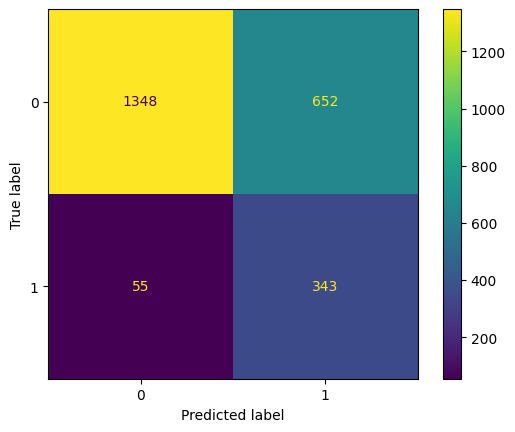

In [76]:
plot_confusion_matrix(log_model_eng, y_eval, y_pred_log_eng)

In [77]:
log_eng_report = classification_report(y_eval, y_pred_log_eng)
print(log_eng_report)

              precision    recall  f1-score   support

           0       0.96      0.67      0.79      2000
           1       0.34      0.86      0.49       398

    accuracy                           0.71      2398
   macro avg       0.65      0.77      0.64      2398
weighted avg       0.86      0.71      0.74      2398



In [78]:
# Get the predicted probabilities from your logistic regression model
y_pred_log_eng_prob = log_model_eng.predict_proba(X_eval)[:, 1]  

# Compute the AUC score
log_eng_auc = roc_auc_score(y_eval, y_pred_log_eng_prob)

# Print the AUC score
print(f"AUC: {log_eng_auc:.4f}")

AUC: 0.7576


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


An AUC of 0.76 indicates that the logistic regression model has good discriminative power.

In [80]:
# Let's save the model results in a DF
log_eng_report = classification_report(y_eval, y_pred_log_eng, output_dict=True)

# Extract accuracy and macro_avg
macro_avg = log_eng_report['macro avg']
accuracy = accuracy_score(y_eval, y_pred_log_eng)

# Create a DataFrame for the model's overall scores
log_eng_results_df = pd.DataFrame({
    'model': ['Logistic Regression - F. Eng.'],
    'accuracy': [accuracy],
    'precision': [macro_avg['precision']],
    'recall': [macro_avg['recall']],
    'f1-score': [macro_avg['f1-score']],
    'auc': [log_eng_auc]
})

# Show final DF
log_eng_results_df

,model,accuracy,precision,recall,f1-score,auc
0,Logistic Regression - F. Eng.,0.705171,0.652761,0.767905,0.642352,0.757592


### Model 4: Random Forest with Feature Engineering

In [81]:
# Predict variables
y_pred_rf_eng = best_rf_model_eng.predict(X_eval)


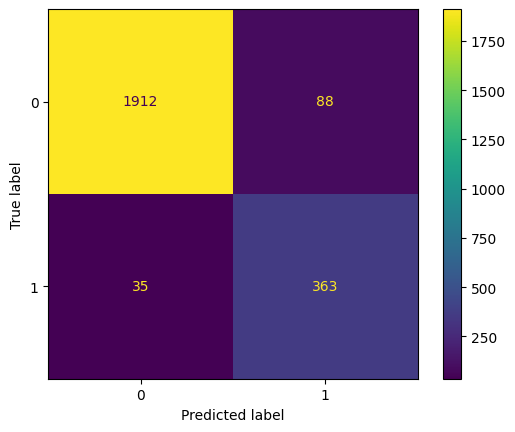

In [82]:
plot_confusion_matrix(best_rf_model_eng, y_eval, y_pred_rf_eng)

In [83]:
rf_eng_report = classification_report(y_eval, y_pred_rf_eng)
print(rf_eng_report)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2000
           1       0.80      0.91      0.86       398

    accuracy                           0.95      2398
   macro avg       0.89      0.93      0.91      2398
weighted avg       0.95      0.95      0.95      2398



	- High overall accuracy (95%)
	-	Strong F1-score for both classes
	-	Recall of 91% for class 1 means your model is catching most of the minority class cases, which is crucial for this use case.
    
    BUT 
    
    Consider tuning specifically for recall if missing class 1 ('left') has a higher cost than false positives.

In [84]:
# Save scores
accuracy = accuracy_score(y_eval, y_pred_rf_eng)
precision = precision_score(y_eval, y_pred_rf_eng)
recall = recall_score(y_eval, y_pred_rf_eng)
f1 = f1_score(y_eval, y_pred_rf_eng)
y_proba_rf_eng = best_rf_model_eng.predict_proba(X_eval)[:, 1]
auc = roc_auc_score(y_eval, y_proba_rf_eng)

In [86]:
# Create DF
rf_eng_results_df = pd.DataFrame({
    'model': ['Random Forest - F. Eng.'],
    'accuracy': [accuracy],
    'precision': [precision],
    'recall': [recall],
    'f1-score': [f1],
    'auc': [auc]
})

# Append to existing table
results_df = pd.concat([log_eng_results_df,
                        rf_eng_results_df], 
                       ignore_index=True)

# Show final DF
results_df

,model,accuracy,precision,recall,f1-score,auc
0,Logistic Regression - F. Eng.,0.705171,0.652761,0.767905,0.642352,0.757592
1,Random Forest - F. Eng.,0.948707,0.804878,0.912060,0.855124,0.970740


From the table, it's clear that the Random Forest model perfomed best, so it will be our champion model. We will now fit it to the test data and see how it performs.

### Champion Model: Final Test

In [87]:
# Make predictions on the test set
y_pred_test = best_rf_model_eng.predict(X_test)

# For probabilities 
y_proba_test = best_rf_model_eng.predict_proba(X_test)[:, 1]  

In [88]:
# Evaluate metrics
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
auc = roc_auc_score(y_test, y_proba_test)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC:", auc)

# Detailed classification report
print(classification_report(y_test, y_pred_test))

Accuracy: 0.9508128386827845
Precision: 0.8043478260869565
Recall: 0.9296482412060302
F1-score: 0.8624708624708625
AUC: 0.966647329601531
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      2001
           1       0.80      0.93      0.86       398

    accuracy                           0.95      2399
   macro avg       0.89      0.94      0.92      2399
weighted avg       0.96      0.95      0.95      2399



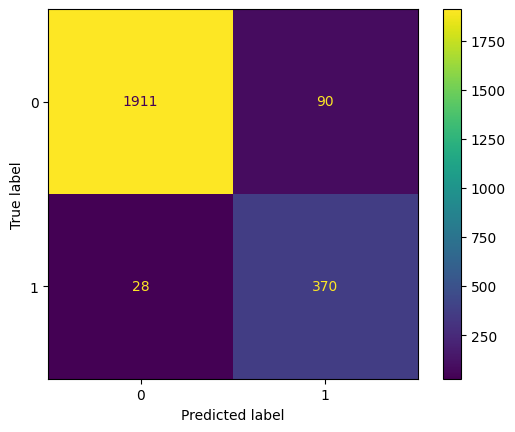

In [89]:
plot_confusion_matrix(best_rf_model_eng, y_test, y_pred_test)

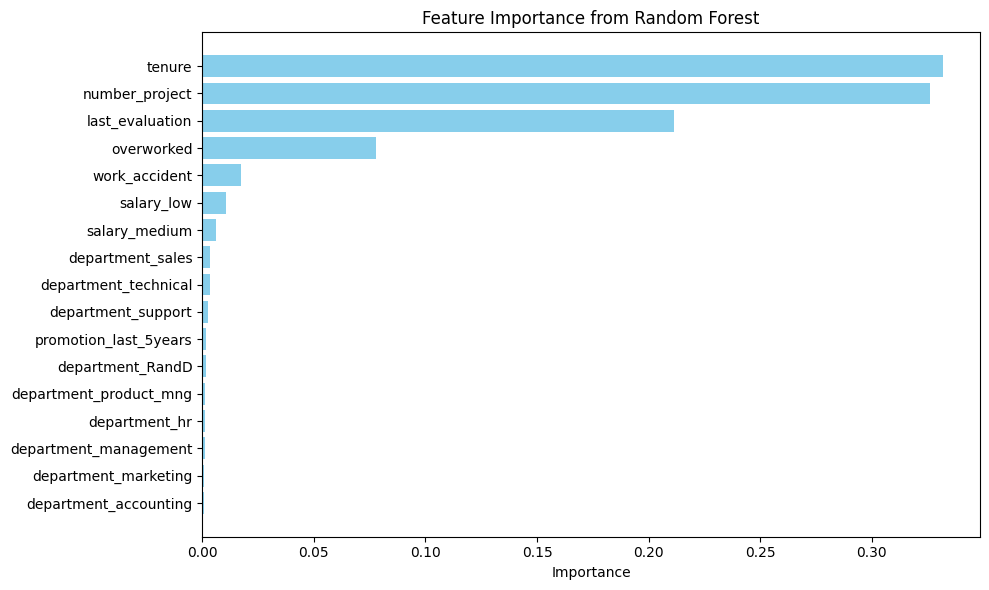

In [90]:
# Extract feature importances
importances = best_rf_model_eng.feature_importances_
feature_names = X_train.columns  # Replace with your actual feature names

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.tight_layout()
plt.show()

In [91]:
feature_importances.head()

,Feature,Importance
2,tenure,0.331852
1,number_project,0.326145
0,last_evaluation,0.211289
16,overworked,0.077870
3,work_accident,0.017537


The built-in Random Forest method measures how much each feature reduces the Gini impurity across all trees.

tenure and number of projects are by far the top two most influential features in terms of how the model splits the data.

Other features like last_evaluation, overworked, and work_accident also play a role but to a lesser extent.


Let's validate these results with permutation importance

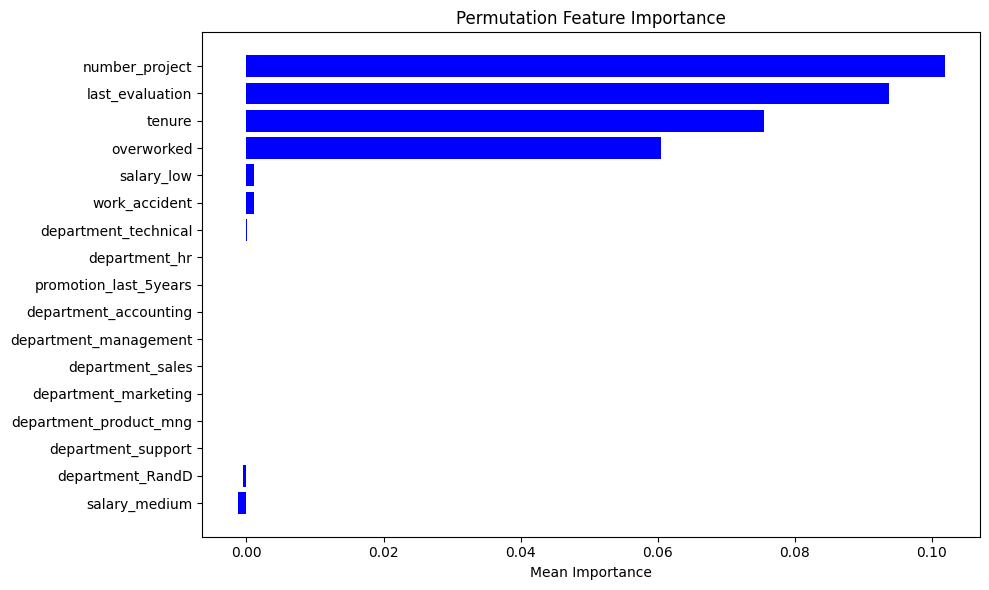

In [92]:
# Compute permutation importances
permutation_importances = permutation_importance(best_rf_model_eng, 
                                                 X_test, 
                                                 y_test, 
                                                 n_repeats=10, 
                                                 random_state=42, 
                                                 n_jobs=-1)

# Create a DataFrame for visualization
perm_importances = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': permutation_importances.importances_mean
})

# Sort the DataFrame by importance
perm_importances = perm_importances.sort_values(by='Importance', ascending=False)

# Plot the permutation importances
plt.figure(figsize=(10, 6))
plt.barh(perm_importances['Feature'], perm_importances['Importance'], color='blue')
plt.xlabel('Mean Importance')
plt.title('Permutation Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [93]:
perm_importances.head()

,Feature,Importance
1,number_project,0.101876
0,last_evaluation,0.093706
2,tenure,0.075490
16,overworked,0.060484
14,salary_low,0.001167


The permutation importance method evaluates how the model’s accuracy drops when a feature is randomly shuffled.

Since permutation importance gives a more trustworthy view on how much each feature actually affects predictions, here’s a reliable ranking of feature importances for business decisions:
	1.	✅ Number of projects → Key driver of attrition: could reflect overwork or stagnation .
	2.	✅ Last Evaluation → May reflect mismatched performance recognition.
	3.	✅ Tenure → May reflect mismatched experience recognition.
	4.	✅ Overworked → Potentially a signal of burnout.
The plot above shows that in this random forest model, `number_project`, `last_evaluation`, `tenure`, and `overworked` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, `left`, and they are the same as the ones used by the decision tree model.

### Summary of model results

- Accuracy: 95% – The model correctly classifies most cases overall.
	
- Precision (Class 1 – Left): 81% – When the model predicts an employee will leave, it is correct 81% of the time.
- Recall (Class 1 – Left): 93% – The model successfully captures the majority of employees who actually left.
- F1-score: 87% – Indicates a strong balance between precision and recall.
- AUC (Area Under the Curve): 0.97 – Confirms the model is highly effective at distinguishing between leavers and stayers.

We observed 86 false positives (flagged as leavers but stayed) and 29 false negatives (missed cases of attrition). These numbers are acceptable within the current business context, but they also highlight potential areas for improvement. Depending on risk tolerance, you may consider adjusting the classification threshold:
- To reduce false negatives, prioritise recall (catch more at-risk employees).
- To reduce false positives, prioritise precision (avoid unnecessary interventions).

### Conclusion, Recommendations, Next Steps

We trained a machine learning model to predict employee attrition at Salifort Motors, using key workplace metrics. Performance was evaluated on unseen data to ensure reliability.
	
    •	The model achieves 95% accuracy, with 81% precision and 93% recall for identifying employees likely to leave.
	
    •	The F1-score of 87% reflects a strong balance between precision and recall.
	
    •	The AUC of 0.97 confirms excellent separation between leavers and stayers.

While we observed 86 false positives and 29 false negatives, this is within acceptable limits. However, business risk tolerance could justify adjusting the prediction threshold to prioritise either catching more at-risk employees (higher recall) or reducing false alarms (higher precision).

Our model identified these four features—number_project, last_evaluation, tenure, and overworked—as the ones carrying the most weight in predicting whether an employee will leave. These are consistent with the patterns observed in the decision tree model as well.

We would recommend monitoring model in real-time settings to check for performance drift and considering retraining periodically as data evolves.
As a next step, you could try adjusting threshold to favour precision or recall depending on business priority.

